Exact solution (P): 0.774537544799685


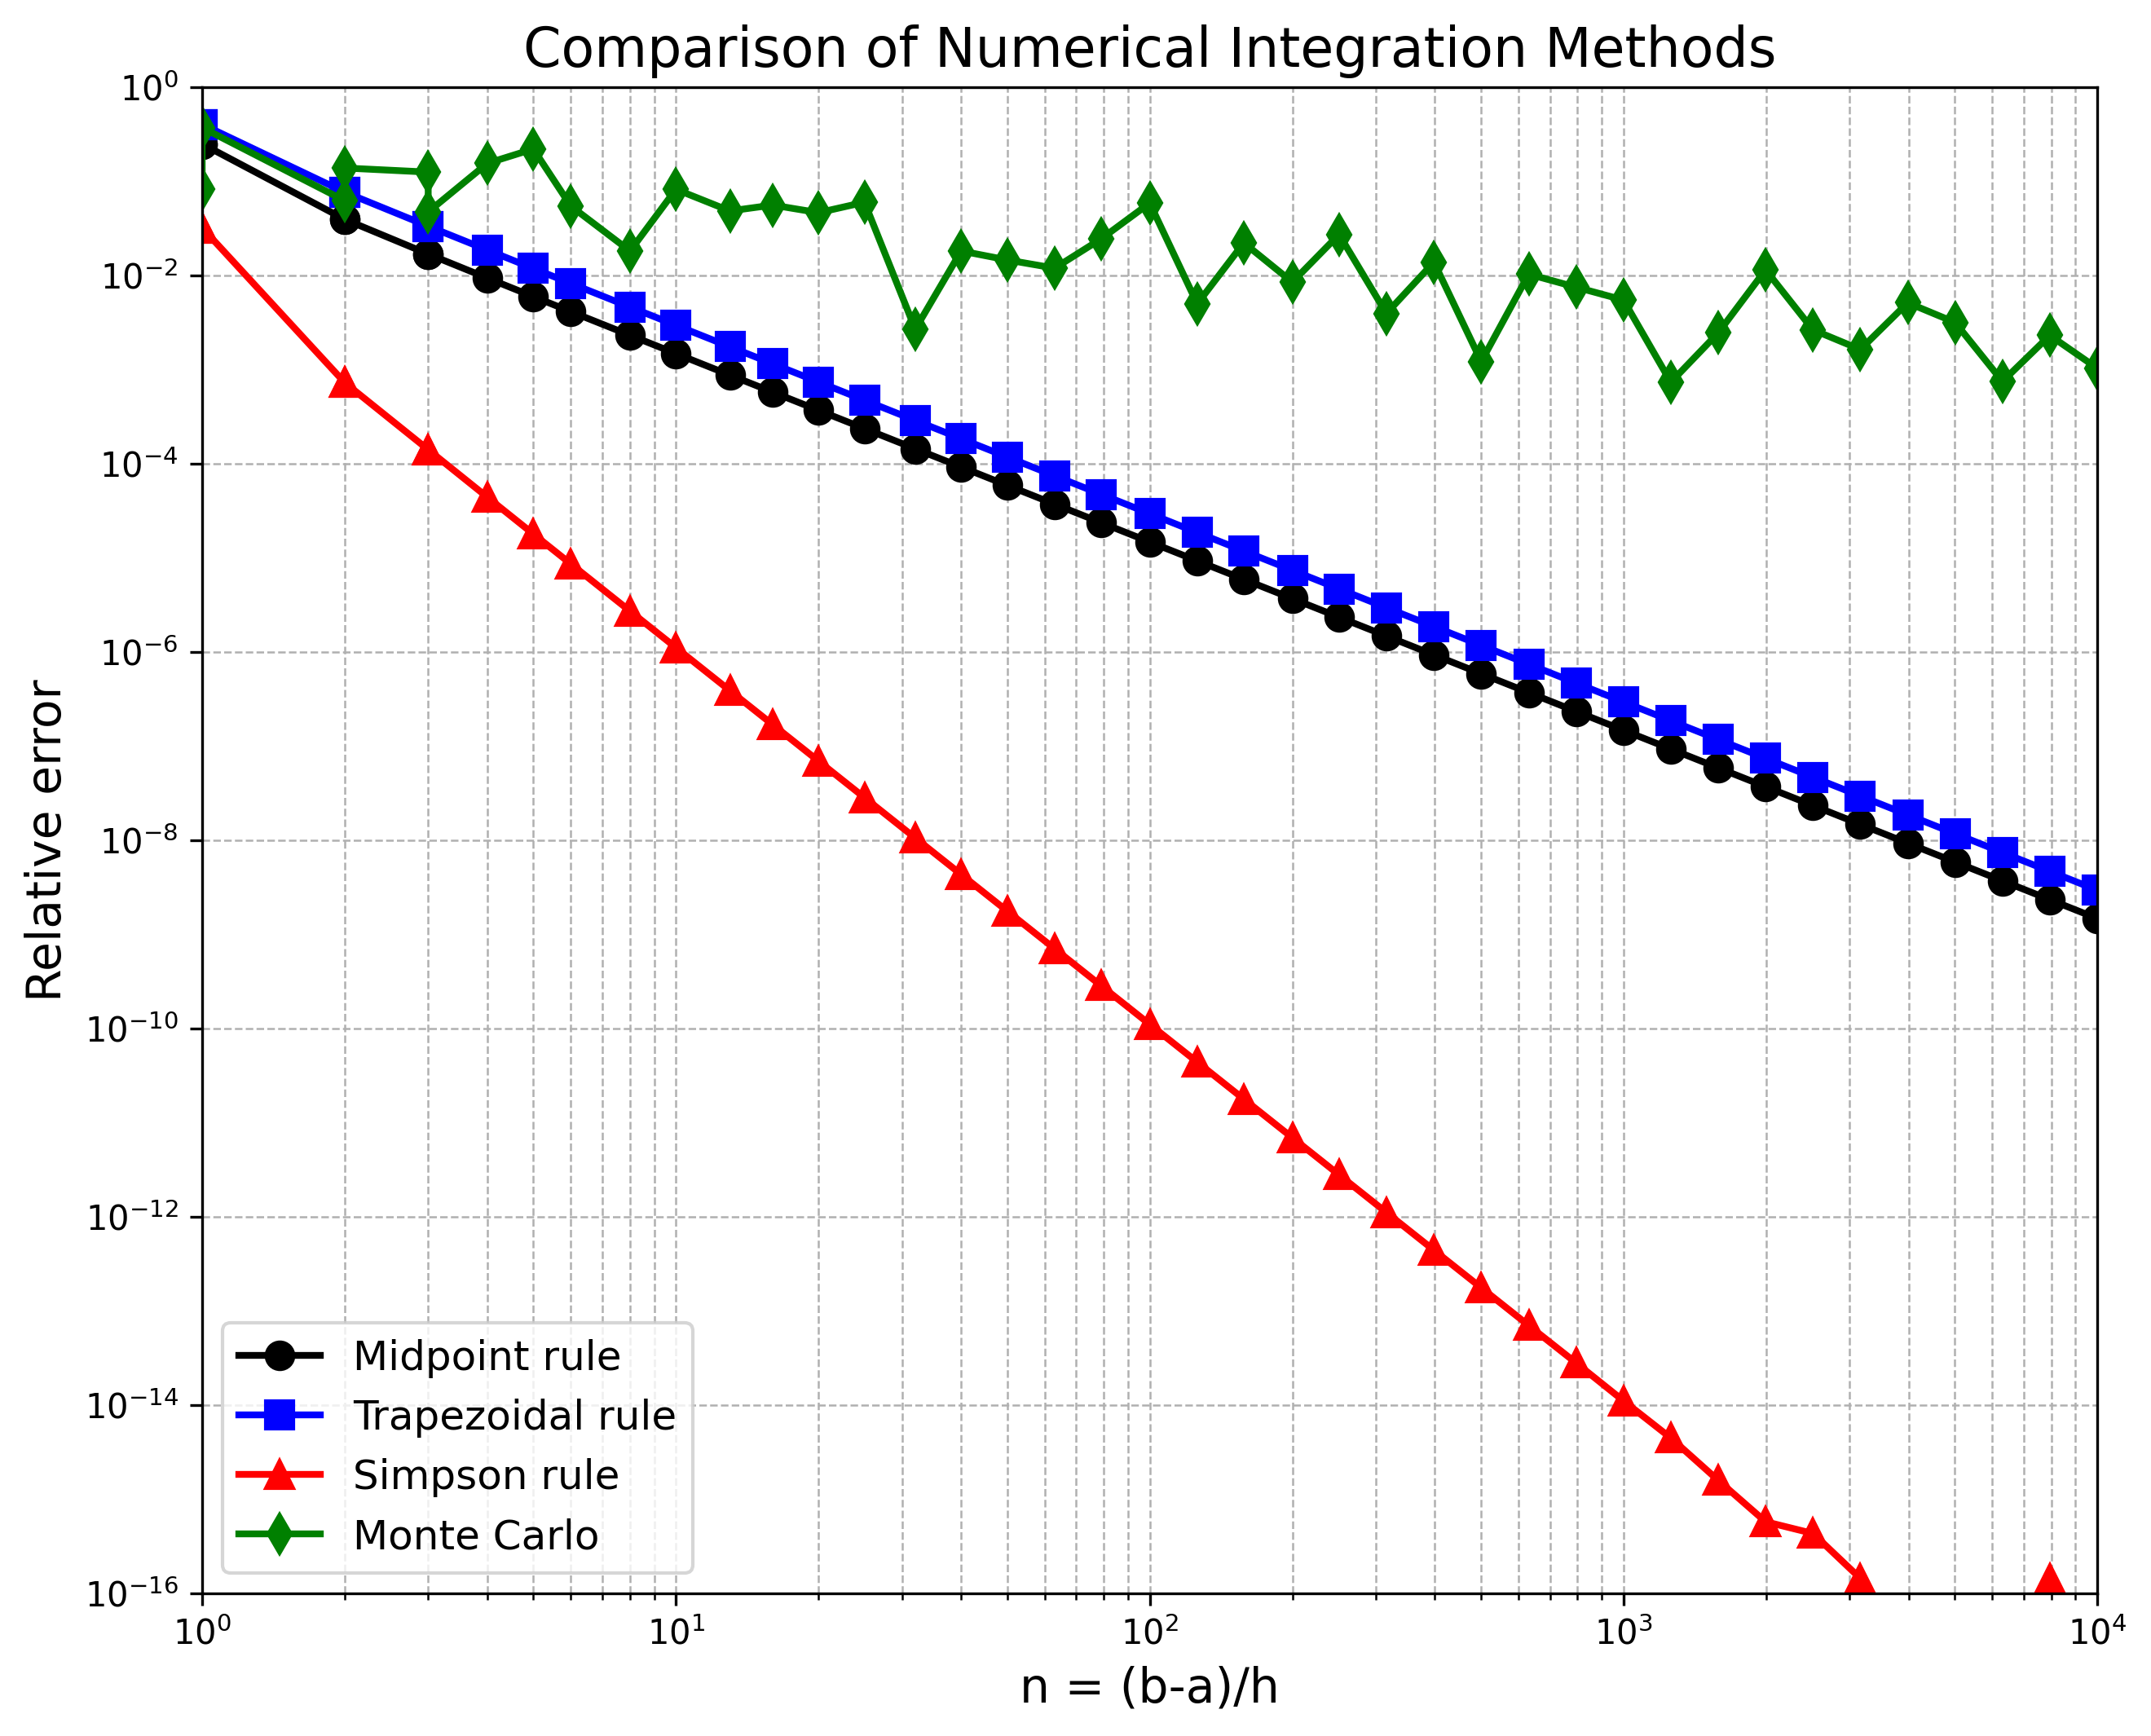

In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Setting up the parameters for the probability density function
mu = 3
sigma = 2
# Define a lambda function for the probability density function (pdf)
f = lambda x: norm.pdf(x, mu, sigma)
# Define the integration bounds
a = 0
b = 5

# Create an array of n values that are spaced logarithmically between 10^0 and 10^4, and round to integers
n = np.round(np.logspace(0, 4, 41)).astype(int)
# Calculate the step size h for each n
h = (b - a) / n

# Initialize arrays to store the results of the numerical integration methods
M = np.zeros(len(n))  # midpoint rule
T = np.zeros(len(n))  # trapezoidal rule
S = np.zeros(len(n))  # Simpson's rule
MC = np.zeros(len(n))  # Monte Carlo

# Loop over the different values of n and compute the numerical integrals
for i in range(len(n)):
    x = a + (np.arange(1, n[i]) * h[i])   # Create an array of x values for trapezoidal and Simpson's rule
    x2 = a + (np.arange(1, n[i] + 1) - 0.5) * h[i] # Midpoint of each subinterval
    xMC = a + (b - a) * np.random.rand(n[i]) # Random points for Monte Carlo
    # Compute the numerical integrals using the different methods
    M[i] = h[i] * np.sum(f(x2)) # Midpoint rule
    T[i] = h[i] * (f(a) / 2 + np.sum(f(x)) + f(b) / 2) # Trapezoidal rule
    S[i] = h[i] * (f(a) / 6 + np.sum(f(x)) / 3 + 2 * np.sum(f(x2)) / 3 + f(b) / 6) # Simpson's rule
    MC[i] = h[i] * np.sum(f(xMC)) # Monte Carlo

# Use the best Simpson approximation as the "exact" solution
P = S[-1]

# Print the value of P
print("Exact solution (P):", P)

# Create a new figure with a higher definition (DPI = 300)
plt.figure(figsize=(10, 8), dpi=300)

# Add a grid to the plot
plt.grid(True, which="both", linestyle='--', linewidth=0.6)

# Set the x and y axes to log scale
plt.loglog(n, np.abs((M - P) / P), 'ko-', label='Midpoint rule', linewidth=2, markersize=8)
plt.loglog(n, np.abs((T - P) / P), 'bs-', label='Trapezoidal rule', linewidth=2, markersize=8)
plt.loglog(n, np.abs((S - P) / P), 'r^-', label='Simpson rule', linewidth=2, markersize=8)
plt.loglog(n, np.abs((MC - P) / P), 'gd-', label='Monte Carlo', linewidth=2, markersize=8)

# Add labels and a title to the plot with an increased font size
plt.xlabel('n = (b-a)/h', fontsize=14)
plt.ylabel('Relative error', fontsize=14)
plt.title('Comparison of Numerical Integration Methods', fontsize=16)

# Set the y-axis range from 10^-16 to 10^0
plt.ylim(1e-16, 1e0)

# Set the x-axis maximum to 10^4
plt.xlim(1, 1e4)

# Display the legend with a larger font and a fancy box
plt.legend(fontsize=12, fancybox=True)

# Display the plot
plt.show()
